# Import des librarires

In [36]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split,  cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, confusion_matrix # roc_curve, auc,
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import des données

In [2]:
data = pd.read_csv("heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,NaN,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0


# Profiling

In [3]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualisation des données

## Sexe

In [4]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

On voit qu'il y a une sur-représentation des hommes dans le dataset il faudra donc ré-équilibrer les données pour éviter le biais sur le genre

## CP : Répartition des valeurs de la colonne Chest Pain 

<Axes: xlabel='cp', ylabel='Count'>

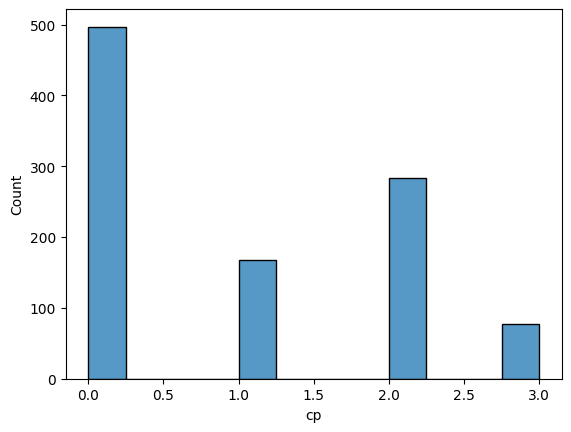

In [15]:
sns.histplot(data['cp'])

## Répartition de bpm au repos

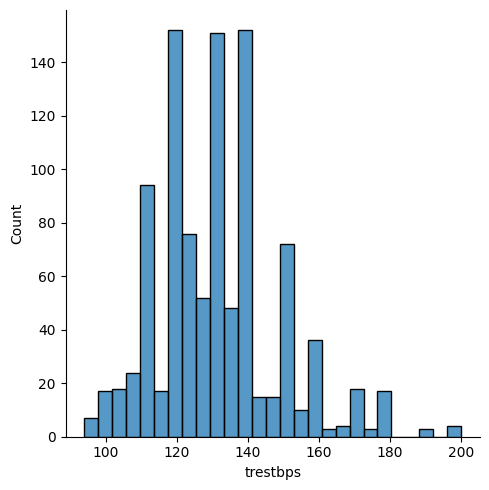

In [16]:
sns.displot(data['trestbps'])

## Répartition du niveau de cholestérol

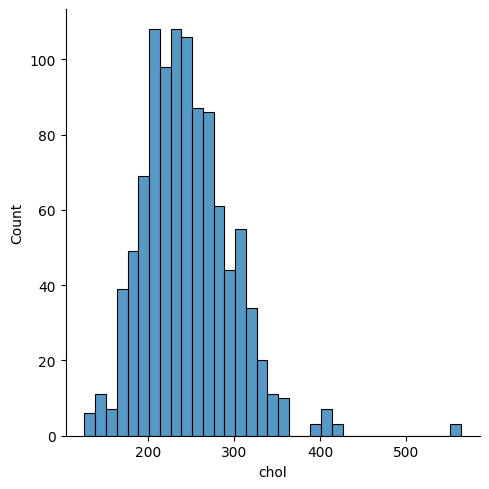

In [90]:
sns.displot(data['chol'])

## Répartition du taux de glycémie au repos

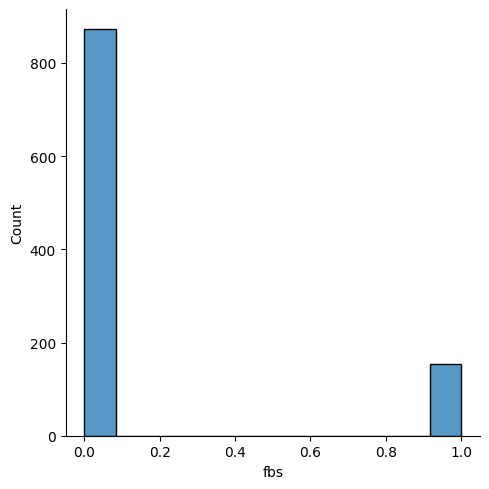

In [91]:
sns.displot(data['fbs'])

## Répartition du niveau de ecg au repos

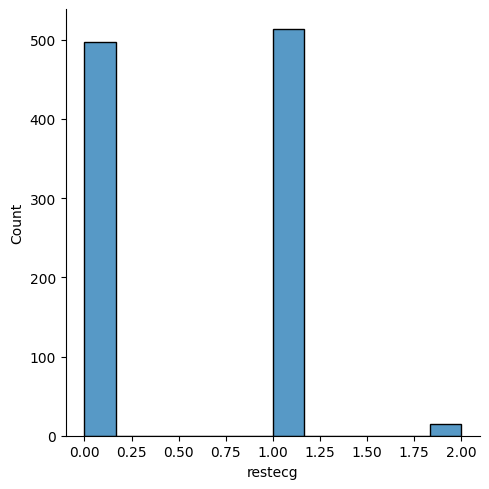

In [92]:
sns.displot(data['restecg'])

## Niveau de thal

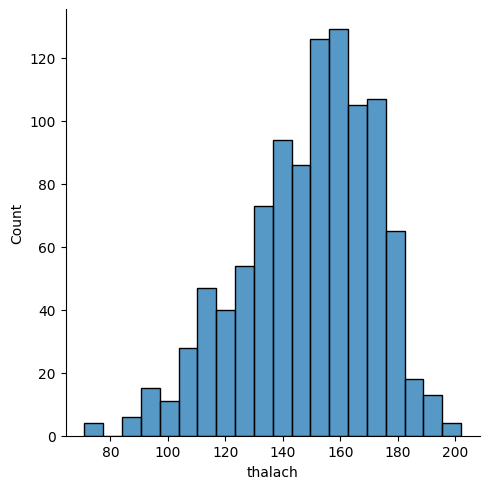

In [93]:
sns.displot(data['thalach'])

## Répartition du niveau d'exang

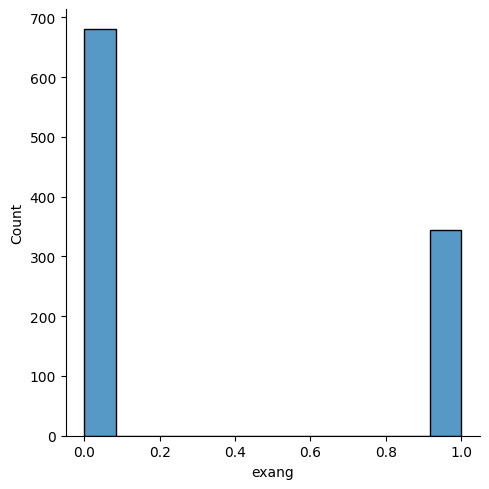

In [94]:
sns.displot(data['exang'])

## Répartition des valeurs de la colonne oldpeak

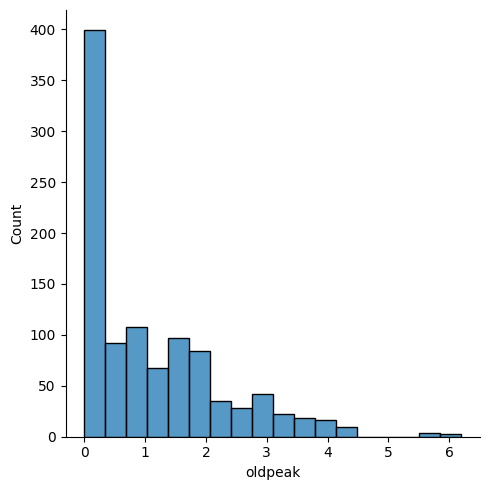

In [96]:
sns.displot(data['oldpeak'])

## Répartition des pentes peak exercise ST segment

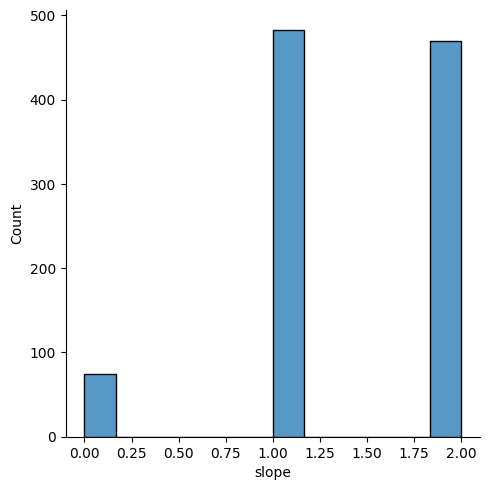

In [97]:
sns.displot(data['slope'])

## Répartition des valeurs de la colonnne ca

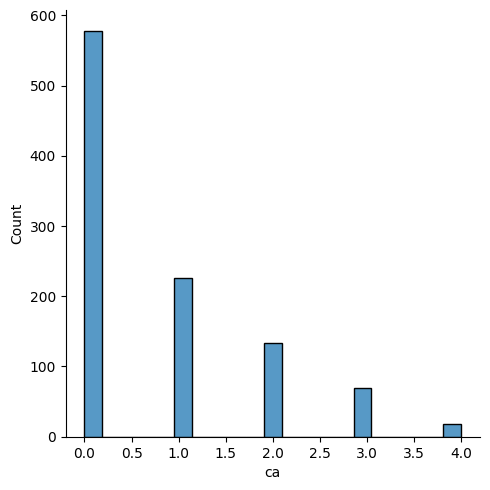

In [98]:
sns.displot(data['ca'])

## Répartition de la colonne thal

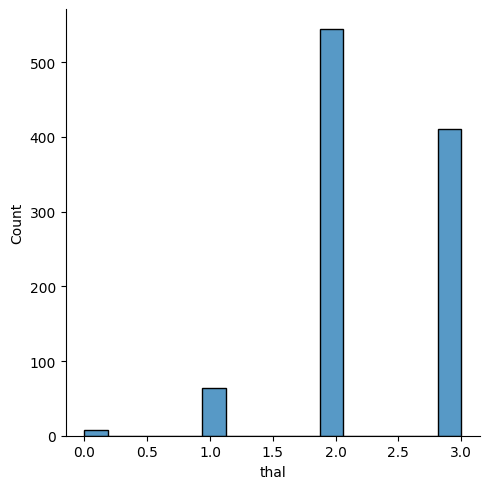

In [99]:
sns.displot(data['thal'])

## Correlations

Text(0.5, 1.0, 'Chest pain and age visualisation target')

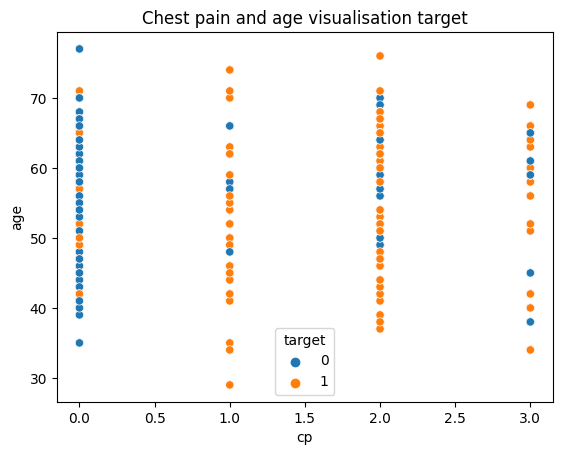

In [103]:
sns.scatterplot(x='cp', y='age', hue='target', data=data)
plt.title('Chest pain and age visualisation target')

Ici on peut en déduire que la variable chest pain a une forte corrélation sur la target car plus une douleur est haute plus il y a de probabilité que la patient soit atteint d'une maladie cardiaque

Text(0.5, 1.0, 'Chest pain and age visualisation target')

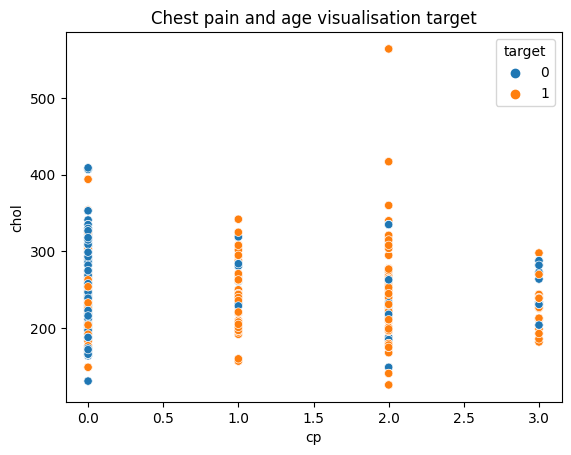

In [104]:
sns.scatterplot(x='cp', y='chol', hue='target', data=data)
plt.title('Chest pain and age visualisation target')

Un haut iveau de cholestérol induit une plus forte chance d'avoir des problèmes cardiaques

In [64]:
sns.lineplot(x='cp', y='age', data=data, hue='target')

<Axes: title={'center': 'Chest pain and age visualisation target'}, xlabel='thal', ylabel='Density'>

Correlation matrix

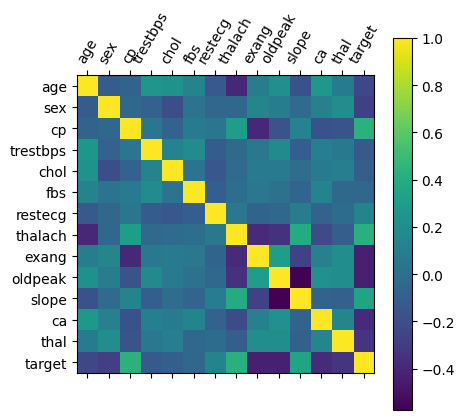

In [ ]:
plt.matshow(data.corr())
plt.xticks(np.arange(len(data.columns)), data.columns, rotation=60)
plt.yticks(np.arange(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

Ici la correlation matrix nous indique que les variables à forte corrélation sont les suivantes : Chest pain, slope et thalach.

## Représentation du nombre de cas tumeur cardiaque par age sur le dataset 

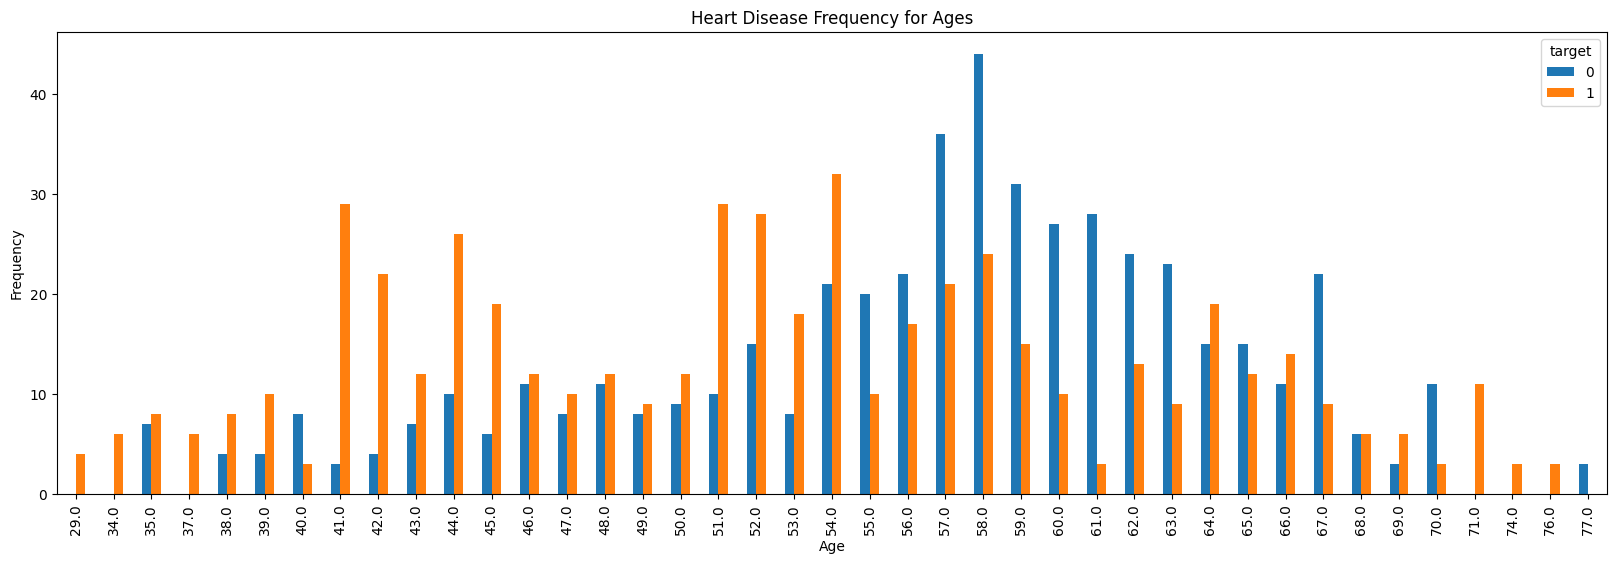

In [105]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Corrélation entre l'age et la probabilité de déclencher maladie cardiaque 

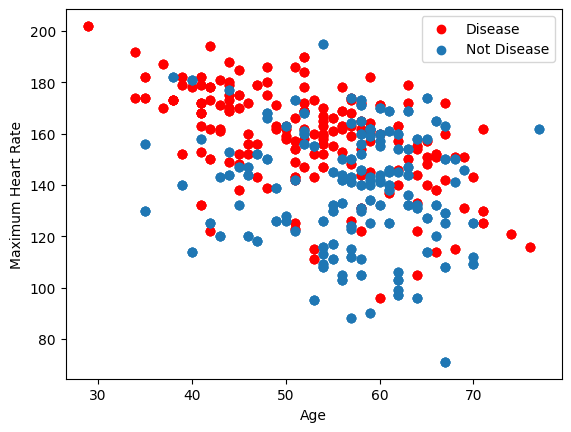

In [106]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Répartition des sex sur la target 

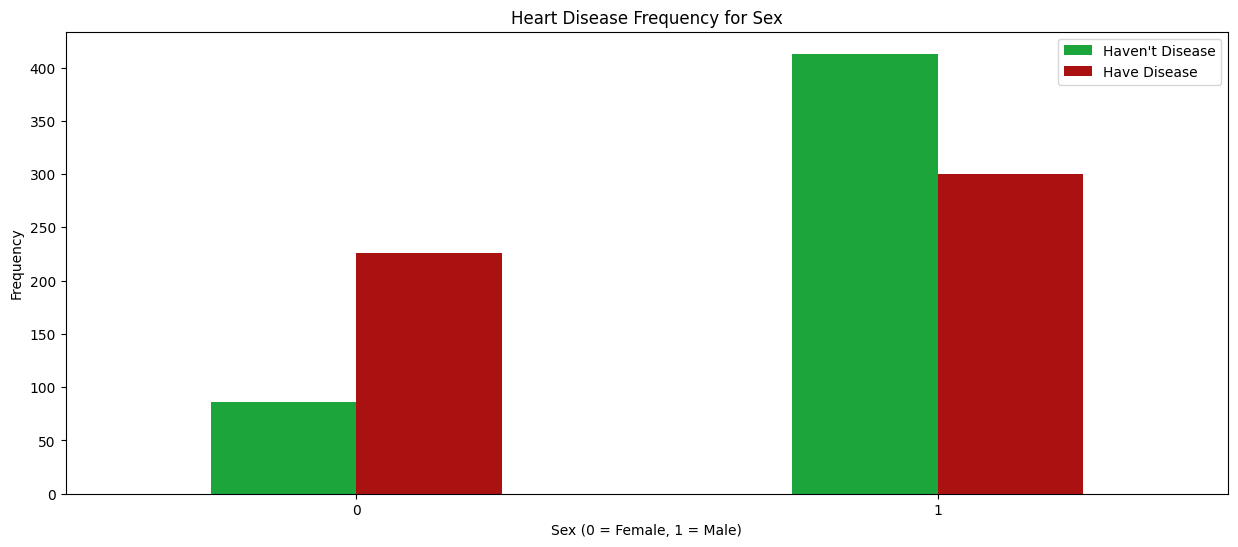

In [107]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Pre-processing

## Traitement des valeurs nulles

In [3]:
data.isnull().sum()

age          7
sex          0
cp           0
trestbps    17
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

## Remplacer les valeurs manquantes par les médianes pour les colonnes trestbps et age

Traitement des valeurs nulles des colonnes trestbps et âge (médiane) - médiane plus fiable 

In [4]:
data = data.fillna(data.mean())
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.512770,0.695610,0.942439,131.385913,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.022559,0.460373,1.029641,17.430131,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Rééquilibrage H/F

In [5]:
len(data[data['sex'] == 1])/len(data)

0.6956097560975609

on remarque qu'il y'a environ 70% d'hommes dans le dataset

### Oversampling

In [6]:
h = data[data['sex'] == 1]
f = data[data['sex'] == 0]
f = f.sample(n=len(h), random_state=42, replace=True)
data_OS = pd.concat([h,f], axis=0)
print("Pourcentage des hommes dans le dataset :")
print(len(data_OS[data_OS['sex'] == 1])/len(data_OS))
data_OS.head(2)
data_OS['target'].value_counts()

Pourcentage des hommes dans le dataset :
0.5


1    790
0    636
Name: target, dtype: int64

La variabnle target reste plus ou moins équilibré

### Undersampling

In [7]:
h = data[data['sex'] == 1]
f = data[data['sex'] == 0]
h = h.sample(n=len(f), random_state=42, replace=True)
data_US = pd.concat([h,f], axis=0)
print("Pourcentage des hommes dans le dataset :")
print(len(data_US[data_US['sex'] == 1])/len(data_US))
data_US.head(2)
data_US['target'].value_counts()

Pourcentage des hommes dans le dataset :
0.5


1    354
0    270
Name: target, dtype: int64

On remarque qu'en équilibrant les sexes, on n'a pas des targets déséquilibrés.

# Arbre de décision

## Avec toutes les colonnes + oversampling

In [9]:
Y = data_OS['target']
X = data_OS.drop(labels=['target'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

tree = DecisionTreeClassifier()

tree = tree.fit(X_train, Y_train)

preds = tree.predict_proba(X_test)[:,1]
f1s = f1_score(Y_test, preds)
print('F1-score : ' + str(f1s))

F1-score : 0.9934354485776805


## Sans les colonnes fortement corrélées (à savoir cp et thal) + oversampling

In [50]:
Y = data_OS['target']
X = data_OS.drop(labels=['target', 'cp', 'thal'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

tree = tree.fit(X_train, Y_train)

preds = tree.predict_proba(X_test)[:,1]

f1s = f1_score(Y_test, preds)
print('F1-score : ' + str(f1s))

F1-score : 0.9921259842519685


## Avec toutes les colonnes + undersampling

In [51]:
Y = data_US['target']
X = data_US.drop(labels=['target'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

tree = tree.fit(X_train, Y_train)

preds = tree.predict_proba(X_test)[:,1]

f1s = f1_score(Y_test, preds)
print('F1-score : ' + str(f1s))

F1-score : 0.9550561797752809


## Sans les colonnes fortement corrélées (à savoir cp et thal) + undersampling

In [52]:
Y = data_US['target']
X = data_US.drop(labels=['target', 'cp', 'thal'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

tree = tree.fit(X_train, Y_train)

preds = tree.predict_proba(X_test)[:,1]

f1s = f1_score(Y_test, preds)
print('F1-score : ' + str(f1s))

F1-score : 0.9714285714285714


On remarque qu'on a un meilleure f1-score en faisant du oversampling et en gardant les variables cp et thal fortement corrélées avec notre target, cependant on a des dupliats dans notre dataset

# Régression logistique

## Test initial

In [23]:
lr_model = LogisticRegression()

lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)

f1 = f1_score(Y_test, y_pred)
print("F1 Score : " + str(f1))

F1 Score : 0.860125260960334


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ici on voit que le modèle n'a pas une performance très élevée, et qu'il ne correspond pas au jeu de donnée initial.

## Test 2

### Mise à l'échelle standardisation des données

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

### Régression logistique et cross-validation

In [30]:
cv_scores = cross_val_score(lr, x_train_scaled, Y_train, cv=5)  # 5-fold cross-validation
mean_cv_accuracy = np.mean(cv_scores) * 100
print("Mean Cross-Validation Accuracy {:.2f}%".format(mean_cv_accuracy))

Mean Cross-Validation Accuracy 88.17%


### Ré-entraînement du modèle sur les données intiales

In [31]:
lr_model.fit(x_train_scaled, Y_train)

LogisticRegression()

### Test accuracy et f1 score

In [32]:
test_acc = lr_model.score(x_test_scaled, Y_test) * 100
print("Test Accuracy {:.2f}%".format(test_acc))

Test Accuracy 84.35%


### Prédictions sur les données d'entraînement

In [33]:
y_pred_train = lr_model.predict(x_train_scaled)
f1 = f1_score(Y_train.T, y_pred_train)
print("F1-score sur les données d'entraînement: {:.2f}".format(f1))

F1-score sur les données d'entraînement: 0.91


### Visualiser la prédiction avec matrice de confusion et seaborn

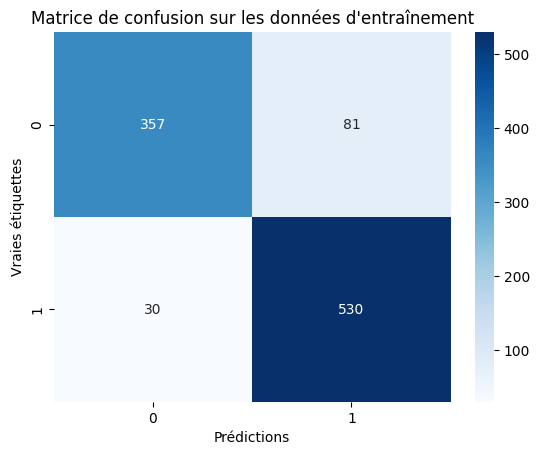

In [35]:
conf_matrix = confusion_matrix(Y_train, y_pred_train)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion sur les données d\'entraînement')
plt.show()

## Test 3 : Optimisation des hyperparamètres

### Hyperparamter space

In [18]:
hyperparam_space = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear'],  
    'max_iter': [100, 200, 300, 500], 
    'random_state': [42] 
}

On utilise la fonction d'erreur quadratique plutôt que la vaeur absolue et on n'utilise pas l'algorithme saga vu que le dataset n'est pas grand

### Grid search

In [19]:
lr_model = LogisticRegression()

grid_search_lr = GridSearchCV(estimator=lr_model,
                               param_grid=hyperparam_space,
                               scoring='f1', 
                               cv=8)

grid_search_lr.fit(X, Y.values)

best_parameters_lr = grid_search_lr.best_params_
best_f1_lr = grid_search_lr.best_score_

print('Best parameters: ' + str(best_parameters_lr))
print('Best F1-score: ' + str(best_f1_lr))

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best F1-score: 0.8938952255858873


# Test KNN classification

## Entrainement du modèle

In [39]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))

2 NN Score: 95.56%


n_neighbors means k - après essayer avec la fonction de coude pour voir le nombre de K optimal

## Prédictions sur les données d'entraînement

In [42]:
prediction = knn.predict(X_train)
f1 = f1_score(Y_train, prediction)
print("F1-score sur les données d'entraînement: {:.2f}".format(f1))

F1-score sur les données d'entraînement: 0.99


## Visualisation avec seaborn du résultat K-NN et matrice de confusion

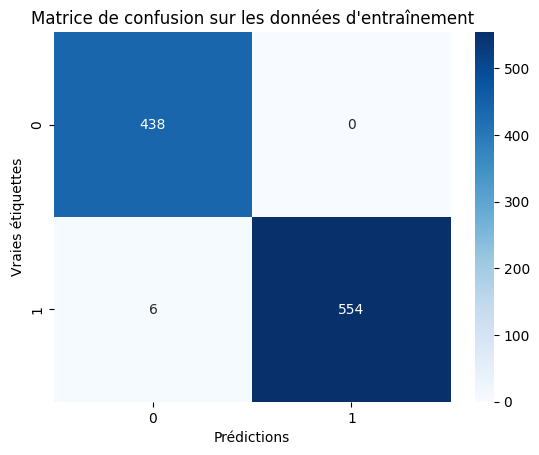

In [43]:
conf_matrix = confusion_matrix(Y_train, prediction)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion sur les données d\'entraînement')
plt.show()

# Random forests

## Hyperparamter space

In [20]:
hyperparam_space = {'n_estimators':[10,15,20,30, 40],
               'criterion':['log_loss', 'entropy', 'gini'], 
               'max_depth': list(range(2,8,1)),
               'min_samples_split':[0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.1],
               'random_state': [42]}

## Executing random forest grid search

In [21]:
rf_grid = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rf_grid,
                                param_grid=hyperparam_space,
                                scoring='roc_auc',
                                cv=8)
grid_search_rf.fit(X, Y.values)

best_parameters_rf = grid_search_rf.best_params_
best_auc_rf = grid_search_rf.best_score_
print('best parameters: ' + str(best_parameters_rf))
print('best F1-score: ' + str(best_auc_rf))

best parameters: {'criterion': 'log_loss', 'max_depth': 7, 'min_samples_split': 0.02, 'n_estimators': 40, 'random_state': 42}
best F1-score: 0.9847305641665949


On obtient un bon score, cependant le temps de computing dépasse les 3 minutes alors que le score de l'arbre était légèrement supérieur et le computing time n'était qu'une fraction de celui des random forests

# Conclusion

On obtient le meilleur score avec le meilleur temps de calcul avec les arbres de décisions suivi par KNN qui ne pourrait peut être pas faire parties des premiers algorithmes qui viennent en tête pour ce genre de problème.